In [2]:
import pandas as pd
import numpy as np
import csv
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow import keras

In [3]:
data=pd.read_csv("WATER_QUALITY_OF_RIVER_GANGA_2013 (1).csv")

In [4]:
data = data.dropna()
#data = data.interpolate(method ='linear', limit_direction ='both')
data = data.drop('NITRATE', axis=1)
# data=data1.copy()

print(data.head)
# data.to_csv('Output.csv')

<bound method NDFrame.head of     TEMPERATURE  D.O.   pH  CONDUCTIVITY   B.O.D.  FECAL COLIFORM  \
1          15.4   8.7  8.1          124.0     0.7           790.0   
2          16.0   8.6  8.1          183.0     1.4            78.0   
3          17.1   9.0  8.2          170.0     1.2            40.0   
4          16.8   8.6  8.3          151.0     1.6            45.0   
9          21.9   9.0  7.4          273.0     2.9           767.0   
14         25.8   8.2  8.0           45.0     4.0          1210.0   
15         25.3   7.9  8.1           44.0     4.2          1569.0   
16         25.6   8.5  8.1           41.0     3.2          1300.0   
17         25.6   8.3  8.1           37.0     3.4          1438.0   
18         25.6   6.8  8.1           59.0     6.7         13292.0   
19         19.1   8.3  7.8          212.0     3.6          4645.0   
20         19.1   8.4  7.8          208.0     3.4          4400.0   
21         24.7   8.5  8.2          367.0     3.6          5033.0   
22  

In [5]:
train, test = train_test_split(data,test_size=0.1,random_state=100)
# X = data.iloc[:,data.columns !='D.O.']
# Y = data[['D.O.']]
# data.corr(method='pearson') 
# X = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
# Y = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(Y)
train_features = train.loc[:,data.columns !='D.O.']
test_features = test.loc[:,data.columns !='D.O.']
train_label = train['D.O.']
test_label = test['D.O.']
# print(X)
# print(Y)

In [6]:
# from sklearn.model_selection import KFold
# kfold=KFold(n_splits=2)
# for train_index, test_index in kfold.split(X):
#     X_train, X_test= X[train_index], X[test_index]
#     Y_train, Y_test= Y[train_index], Y[test_index]

In [7]:
# print(X_train)

In [8]:
print(train_features.shape)
print(train_label.shape)
print(test_features.shape)
print(test_label.shape)

(47, 6)
(47,)
(6, 6)
(6,)


In [9]:
data.corr(method='pearson') 

,TEMPERATURE,D.O.,pH,CONDUCTIVITY,B.O.D.,FECAL COLIFORM,TOTAL COLIFORM
TEMPERATURE,1.000000,-0.522809,-0.393668,0.230872,0.398970,0.237735,0.207422
D.O.,-0.522809,1.000000,0.411175,-0.274046,-0.365193,-0.701497,-0.678096
pH,-0.393668,0.411175,1.000000,-0.123408,-0.087923,-0.282508,-0.254618
CONDUCTIVITY,0.230872,-0.274046,-0.123408,1.000000,-0.094057,0.045642,0.046907
B.O.D.,0.398970,-0.365193,-0.087923,-0.094057,1.000000,0.273361,0.264873
FECAL COLIFORM,0.237735,-0.701497,-0.282508,0.045642,0.273361,1.000000,0.965349
TOTAL COLIFORM,0.207422,-0.678096,-0.254618,0.046907,0.264873,0.965349,1.000000


In [10]:
train_features = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(train_features)
test_features = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit_transform(test_features)
print(train_features)

[[1.15107914e-01 1.00000000e+00 8.59950860e-01 3.33333333e-01
  6.23805178e-03 5.42001971e-03]
 [1.00000000e+00 1.00000000e-01 6.16707617e-01 4.66666667e-01
  4.86121750e-01 2.63521146e-01]
 [7.48201439e-01 6.00000000e-01 1.96560197e-02 5.50000000e-01
  3.89670079e-03 4.17373338e-03]
 [7.69784173e-01 5.00000000e-01 6.11793612e-01 3.00000000e-01
  5.34547417e-03 3.51611846e-03]
 [7.05035971e-01 4.00000000e-01 6.53562654e-01 3.33333333e-01
  8.76924204e-03 7.08314904e-03]
 [8.41726619e-01 6.00000000e-01 6.06879607e-01 2.16666667e-01
  1.03239257e-01 4.49108561e-02]
 [7.84172662e-01 6.00000000e-01 8.50122850e-01 3.16666667e-01
  9.02569158e-03 9.92786389e-03]
 [7.69784173e-01 4.00000000e-01 6.14250614e-01 3.16666667e-01
  4.58944760e-03 3.24564781e-03]
 [0.00000000e+00 7.00000000e-01 2.13759214e-01 0.00000000e+00
  2.49788512e-03 1.65464398e-03]
 [2.66187050e-01 4.00000000e-01 4.20147420e-01 4.50000000e-01
  1.45210389e-02 7.65272841e-03]
 [7.05035971e-01 4.00000000e-01 7.86240786e-01 3.5

In [11]:
# ANFIS MODEL CODE
from Models import myanfis

In [12]:
import sys
sys.maxsize

9223372036854775807

In [54]:
param = myanfis.fis_parameters(
    n_input=6,                # no. of Regressors
    n_memb=3,                 # no. of fuzzy memberships
    batch_size=1,            # 16 / 32 / 64 / ...
    memb_func='gaussian',      # 'gaussian' / 'gbellmf'
    optimizer='sgd',          # sgd / adam / ...
    # mse / mae / huber_loss / mean_absolute_percentage_error / ...
    loss='mse',
    n_epochs=150               # 10 / 25 / 50 / 100 / ...
)

In [55]:
fis = myanfis.ANFIS(n_input=param.n_input,
                    n_memb=param.n_memb,
                    batch_size=param.batch_size,
                    memb_func=param.memb_func,
                    name='myanfis'
                    )

# fis = myanfis.ANFIS(n_input=6,
#                     n_memb=3,
#                     batch_size=1,
#                     memb_func='gaussian',
#                     name='myanfis'
#                     )
# compile model
fis.model.compile(optimizer=param.optimizer,
                    loss=param.loss,
                    metrics=['mse'])
# fis.model.compile(optimizer='sgd',
#                     loss='mae',
#                     metrics=['mae'])

In [56]:
histories=[]
history = fis.fit(train_features, train_label,
                    epochs=param.n_epochs,
                    batch_size=param.batch_size,
                    validation_data=(test_features, test_label)
                    
                    )
histories.append(history)

# histories=[]
# history = fis.fit(train_features, train_label,
#                     epochs=50,
#                     batch_size=1,
#                     validation_data=(test_features, test_label)
                    
#                     )
# histories.append(history)

Epoch 1/150
47/47 [==============================] - 1s 5ms/step - loss: 27.7286 - mse: 27.7286 - val_loss: 3.9697 - val_mse: 3.9697
Epoch 2/150
47/47 [==============================] - 0s 2ms/step - loss: 1.9254 - mse: 1.9254 - val_loss: 1.9402 - val_mse: 1.9402
Epoch 3/150
47/47 [==============================] - 0s 2ms/step - loss: 1.5980 - mse: 1.5980 - val_loss: 1.9390 - val_mse: 1.9390
Epoch 4/150
47/47 [==============================] - 0s 2ms/step - loss: 1.4609 - mse: 1.4609 - val_loss: 2.0426 - val_mse: 2.0426
Epoch 5/150
47/47 [==============================] - 0s 2ms/step - loss: 1.2984 - mse: 1.2984 - val_loss: 2.0616 - val_mse: 2.0616
Epoch 6/150
47/47 [==============================] - 0s 2ms/step - loss: 1.2113 - mse: 1.2113 - val_loss: 1.5433 - val_mse: 1.5433
Epoch 7/150
47/47 [==============================] - 0s 2ms/step - loss: 1.1086 - mse: 1.1086 - val_loss: 1.7447 - val_mse: 1.7447
Epoch 8/150
47/47 [==============================] - 0s 2ms/step - loss: 1.0331 -

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


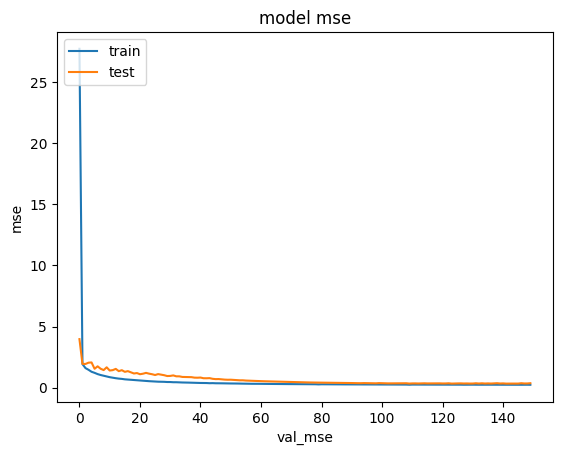

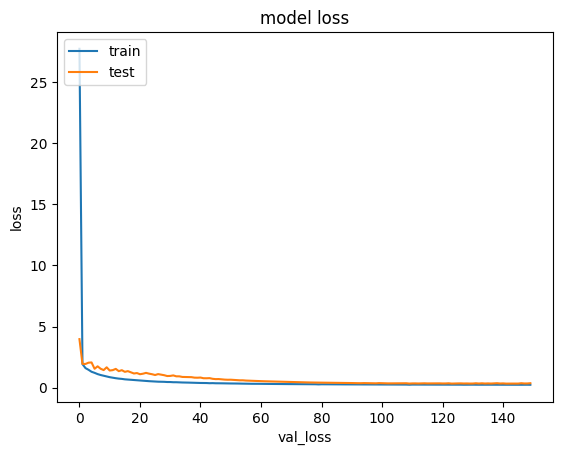

In [57]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('val_mse')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [68]:
# test_pred = fis.model.predict(test_features)
# test_pred=fis.model.predict(test_features,test_label)
# print(test_features)
test_pred=fis(test_features)

print(test_pred)


6/6 [==============================] - 0s 2ms/step
[[7.907351 ]
 [5.2258596]
 [7.416079 ]
 [8.001666 ]
 [7.8638487]
 [8.570636 ]]


In [69]:

for i,j in zip(test_label,test_pred):
    print("actual = ",round(i,2), "predicted = ",round(j[0],2))

actual =  7.8 predicted =  7.91
actual =  5.9 predicted =  5.23
actual =  6.3 predicted =  7.42
actual =  7.9 predicted =  8.0
actual =  7.9 predicted =  7.86
actual =  7.9 predicted =  8.57


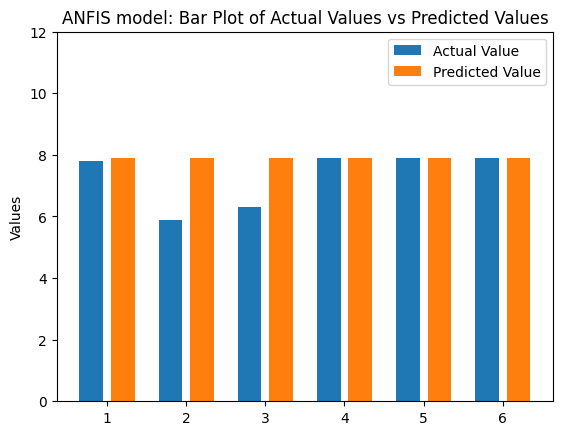

In [70]:
plt.title("ANFIS model: Bar Plot of Actual Values vs Predicted Values")

plt.ylabel("Values")
z = (test_label, test_pred[0])
x = [1,2,3,4,5,6]
base = np.arange(6)
plt.xticks(base, x)
plt.bar(base - 0.2, test_label, 0.3, label = 'Actual Value')
plt.bar(base + 0.2, test_pred[0], 0.3, label = 'Predicted Value')
plt.ylim(top = 12)
plt.legend()
plt.show()

In [71]:

fis.model.evaluate(test_features,test_label,batch_size=1)

6/6 [==============================] - 0s 1ms/step - loss: 0.3622 - mse: 0.3622


[0.362169474363327, 0.362169474363327]

In [72]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# # acc=accuracy_score(test_pred,test_label)
# # print(acc)
# print(test_label)
# con=confusion_matrix(test_label,test_pred)
# print(con)



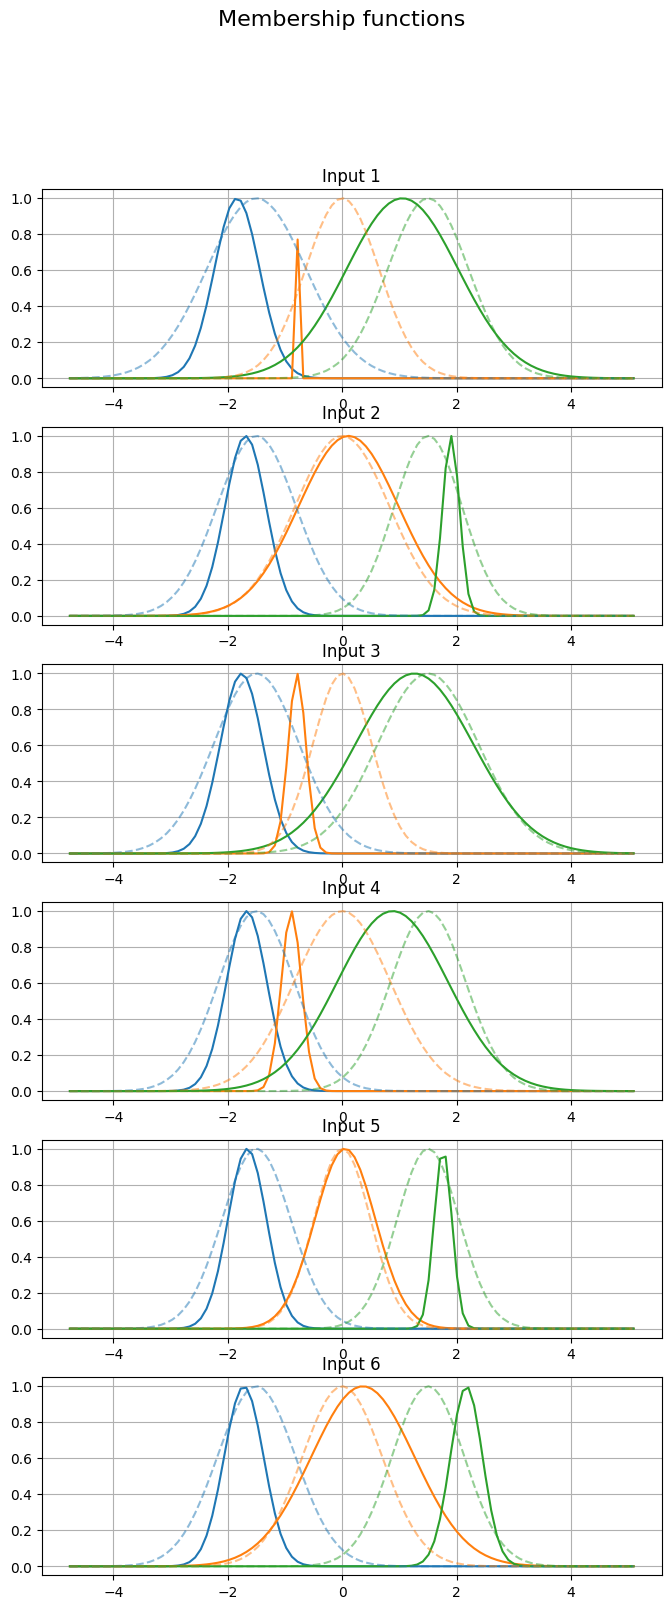

In [73]:
# fis.model.evaluate(test_features,test_label)
import pandas as pd
fis.plotmfs(show_initial_weights=True)

<AxesSubplot: >

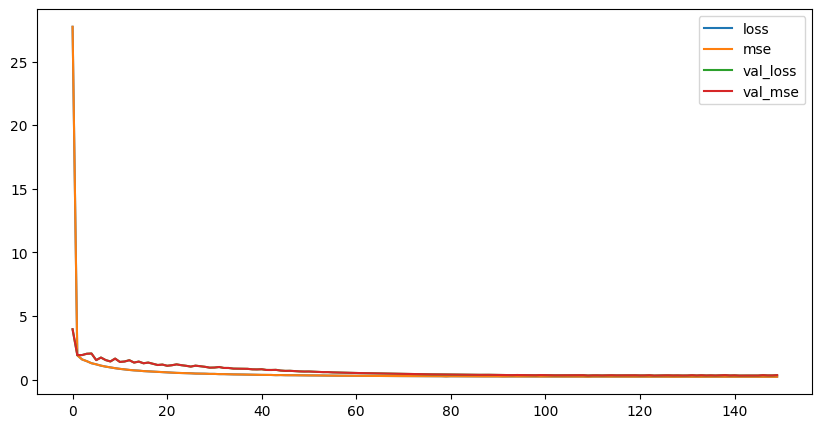

In [74]:
loss_curves = pd.DataFrame(history.history)
loss_curves.plot(figsize=(10,5))



In [75]:
premise_parameters = fis.model.get_layer(
        'fuzzyLayer').get_weights()

In [76]:
fis.model.summary()

Model: "myanfis"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputLayer (InputLayer)        [(1, 6)]             0           []                               
                                                                                                  
 fuzzyLayer (FuzzyLayer)        (1, 3, 6)            36          ['inputLayer[0][0]']             
                                                                                                  
 ruleLayer (RuleLayer)          (1, 729)             0           ['fuzzyLayer[0][0]']             
                                                                                                  
 normLayer (NormLayer)          (1, 729)             0           ['ruleLayer[0][0]']              
                                                                                            